In [127]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from wordcloud import WordCloud, STOPWORDS

In [128]:
data = pd.read_csv('Data/job_data.csv')
data.columns

Index(['company', 'education', 'experience', 'industry', 'jobdescription',
       'jobid', 'joblocation_address', 'jobtitle', 'numberofpositions',
       'payrate', 'postdate', 'site_name', 'skills', 'uniq_id'],
      dtype='object')

In [129]:
data.head(5)

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,Accounts,115d28f140f694dd1cc61c53d03c66ae
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4


In [130]:
data.dtypes

company                 object
education               object
experience              object
industry                object
jobdescription          object
jobid                    int64
joblocation_address     object
jobtitle                object
numberofpositions      float64
payrate                 object
postdate                object
site_name               object
skills                  object
uniq_id                 object
dtype: object

In [131]:
data.drop('site_name', axis=1, inplace=True)
data.drop('numberofpositions', axis=1, inplace=True)
data.drop('joblocation_address', axis=1, inplace=True)
data.drop('uniq_id', axis=1, inplace=True)
data.drop('postdate', axis=1, inplace=True)
data.drop('jobid', axis=1, inplace=True)
data.drop('jobdescription', axis=1, inplace=True)
data.head()

,company,education,experience,industry,jobtitle,payrate,skills
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Walkin Data Entry Operator (night Shift),"1,50,000 - 2,25,000 P.A",ITES
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Work Based Onhome Based Part Time.,"1,50,000 - 2,50,000 P.A. 20000",Marketing
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Pl/sql Developer - SQL,Not Disclosed by Recruiter,IT Software - Application Programming
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Manager/ad/partner - Indirect Tax - CA,Not Disclosed by Recruiter,Accounts
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,JAVA Technical Lead (6-8 yrs) -,Not Disclosed by Recruiter,IT Software - Application Programming


In [132]:
def education_clean(s):
    s = str(s)
    if 'UG' not in s:
        return 'NaN'
    ugi = s.index('UG:')
    if 'PG' in s:
        pgi = s.index('PG:')
        return (s[ugi+3:pgi], s[pgi+3:])
    else:
        return (s[ugi+3:])

data['education'] = data['education'].apply(education_clean)
data.head(5)

,company,education,experience,industry,jobtitle,payrate,skills
0,MM Media Pvt Ltd,"( B.Tech/B.E. - Any Specialization , Any Postg...",0 - 1 yrs,Media / Entertainment / Internet,Walkin Data Entry Operator (night Shift),"1,50,000 - 2,25,000 P.A",ITES
1,find live infotech,"( B.Tech/B.E. - Any Specialization , MBA/PGDM ...",0 - 0 yrs,Advertising / PR / MR / Event Management,Work Based Onhome Based Part Time.,"1,50,000 - 2,50,000 P.A. 20000",Marketing
2,Softtech Career Infosystem Pvt. Ltd,"( Any Graduate - Any Specialization , Any Post...",4 - 8 yrs,IT-Software / Software Services,Pl/sql Developer - SQL,Not Disclosed by Recruiter,IT Software - Application Programming
3,Onboard HRServices LLP,"( Any Graduate - Any Specialization , CA Docto...",11 - 15 yrs,Banking / Financial Services / Broking,Manager/ad/partner - Indirect Tax - CA,Not Disclosed by Recruiter,Accounts
4,Spire Technologies and Solutions Pvt. Ltd.,"( B.Tech/B.E. - Any Specialization , Any Postg...",6 - 8 yrs,IT-Software / Software Services,JAVA Technical Lead (6-8 yrs) -,Not Disclosed by Recruiter,IT Software - Application Programming


In [133]:
def experience_clean(s):
    s = str(s)
    if '-' not in s:
        return 'NaN'
    return (s.split(' - ')[0], (s.split(' - ')[1]).split()[0])

data['experience'] = data['experience'].apply(experience_clean)
data.head(5)

,company,education,experience,industry,jobtitle,payrate,skills
0,MM Media Pvt Ltd,"( B.Tech/B.E. - Any Specialization , Any Postg...","(0, 1)",Media / Entertainment / Internet,Walkin Data Entry Operator (night Shift),"1,50,000 - 2,25,000 P.A",ITES
1,find live infotech,"( B.Tech/B.E. - Any Specialization , MBA/PGDM ...","(0, 0)",Advertising / PR / MR / Event Management,Work Based Onhome Based Part Time.,"1,50,000 - 2,50,000 P.A. 20000",Marketing
2,Softtech Career Infosystem Pvt. Ltd,"( Any Graduate - Any Specialization , Any Post...","(4, 8)",IT-Software / Software Services,Pl/sql Developer - SQL,Not Disclosed by Recruiter,IT Software - Application Programming
3,Onboard HRServices LLP,"( Any Graduate - Any Specialization , CA Docto...","(11, 15)",Banking / Financial Services / Broking,Manager/ad/partner - Indirect Tax - CA,Not Disclosed by Recruiter,Accounts
4,Spire Technologies and Solutions Pvt. Ltd.,"( B.Tech/B.E. - Any Specialization , Any Postg...","(6, 8)",IT-Software / Software Services,JAVA Technical Lead (6-8 yrs) -,Not Disclosed by Recruiter,IT Software - Application Programming


In [134]:
data['industry'] = data['industry'].apply(lambda x: str(x).replace(' /',','))
data.head(5)

,company,education,experience,industry,jobtitle,payrate,skills
0,MM Media Pvt Ltd,"( B.Tech/B.E. - Any Specialization , Any Postg...","(0, 1)","Media, Entertainment, Internet",Walkin Data Entry Operator (night Shift),"1,50,000 - 2,25,000 P.A",ITES
1,find live infotech,"( B.Tech/B.E. - Any Specialization , MBA/PGDM ...","(0, 0)","Advertising, PR, MR, Event Management",Work Based Onhome Based Part Time.,"1,50,000 - 2,50,000 P.A. 20000",Marketing
2,Softtech Career Infosystem Pvt. Ltd,"( Any Graduate - Any Specialization , Any Post...","(4, 8)","IT-Software, Software Services",Pl/sql Developer - SQL,Not Disclosed by Recruiter,IT Software - Application Programming
3,Onboard HRServices LLP,"( Any Graduate - Any Specialization , CA Docto...","(11, 15)","Banking, Financial Services, Broking",Manager/ad/partner - Indirect Tax - CA,Not Disclosed by Recruiter,Accounts
4,Spire Technologies and Solutions Pvt. Ltd.,"( B.Tech/B.E. - Any Specialization , Any Postg...","(6, 8)","IT-Software, Software Services",JAVA Technical Lead (6-8 yrs) -,Not Disclosed by Recruiter,IT Software - Application Programming


In [135]:
def payrate_clean(s):
    s = str(s)
    if '-' not in s:
        return 'NaN'
    if ' ' in s:
        return (s.split(' ')[0], (s.split(' ')[2]))
    else:
        return (s.split('-')[0], (s.split('-')[1]))
data['payrate'] = data['payrate'].apply(payrate_clean)
data.head(5)

,company,education,experience,industry,jobtitle,payrate,skills
0,MM Media Pvt Ltd,"( B.Tech/B.E. - Any Specialization , Any Postg...","(0, 1)","Media, Entertainment, Internet",Walkin Data Entry Operator (night Shift),"(1,50,000, 2,25,000)",ITES
1,find live infotech,"( B.Tech/B.E. - Any Specialization , MBA/PGDM ...","(0, 0)","Advertising, PR, MR, Event Management",Work Based Onhome Based Part Time.,"(1,50,000, 2,50,000)",Marketing
2,Softtech Career Infosystem Pvt. Ltd,"( Any Graduate - Any Specialization , Any Post...","(4, 8)","IT-Software, Software Services",Pl/sql Developer - SQL,NaN,IT Software - Application Programming
3,Onboard HRServices LLP,"( Any Graduate - Any Specialization , CA Docto...","(11, 15)","Banking, Financial Services, Broking",Manager/ad/partner - Indirect Tax - CA,NaN,Accounts
4,Spire Technologies and Solutions Pvt. Ltd.,"( B.Tech/B.E. - Any Specialization , Any Postg...","(6, 8)","IT-Software, Software Services",JAVA Technical Lead (6-8 yrs) -,NaN,IT Software - Application Programming


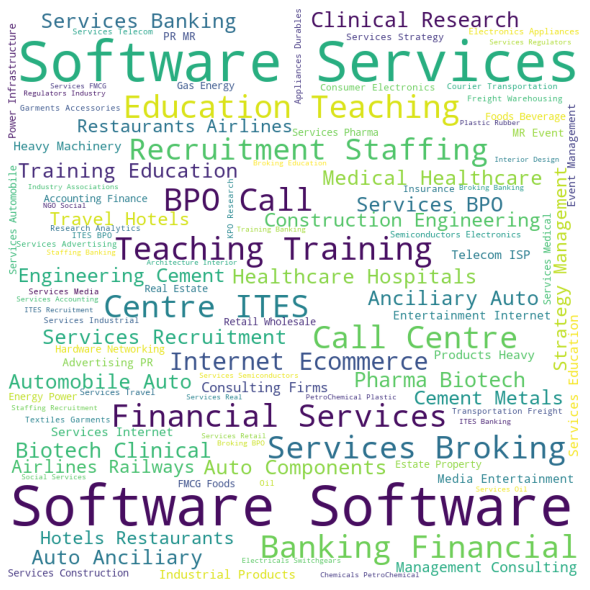

In [136]:
stopwords = set(STOPWORDS)
text = " ".join(i.strip() for i in (data.industry))

wordcloud = WordCloud(width = 800, height = 800,stopwords = stopwords, background_color ='white',min_font_size = 10).generate(text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [137]:
def avg_experience(n):
    if n == 'NaN':
        return 'NaN'
    return (int(n[0]) + int(n[1]))/2

data['avg_experience_in_yrs'] = data['experience'].apply(avg_experience)
data.head(5)

,company,education,experience,industry,jobtitle,payrate,skills,avg_experience_in_yrs
0,MM Media Pvt Ltd,"( B.Tech/B.E. - Any Specialization , Any Postg...","(0, 1)","Media, Entertainment, Internet",Walkin Data Entry Operator (night Shift),"(1,50,000, 2,25,000)",ITES,0.5
1,find live infotech,"( B.Tech/B.E. - Any Specialization , MBA/PGDM ...","(0, 0)","Advertising, PR, MR, Event Management",Work Based Onhome Based Part Time.,"(1,50,000, 2,50,000)",Marketing,0.0
2,Softtech Career Infosystem Pvt. Ltd,"( Any Graduate - Any Specialization , Any Post...","(4, 8)","IT-Software, Software Services",Pl/sql Developer - SQL,NaN,IT Software - Application Programming,6.0
3,Onboard HRServices LLP,"( Any Graduate - Any Specialization , CA Docto...","(11, 15)","Banking, Financial Services, Broking",Manager/ad/partner - Indirect Tax - CA,NaN,Accounts,13.0
4,Spire Technologies and Solutions Pvt. Ltd.,"( B.Tech/B.E. - Any Specialization , Any Postg...","(6, 8)","IT-Software, Software Services",JAVA Technical Lead (6-8 yrs) -,NaN,IT Software - Application Programming,7.0


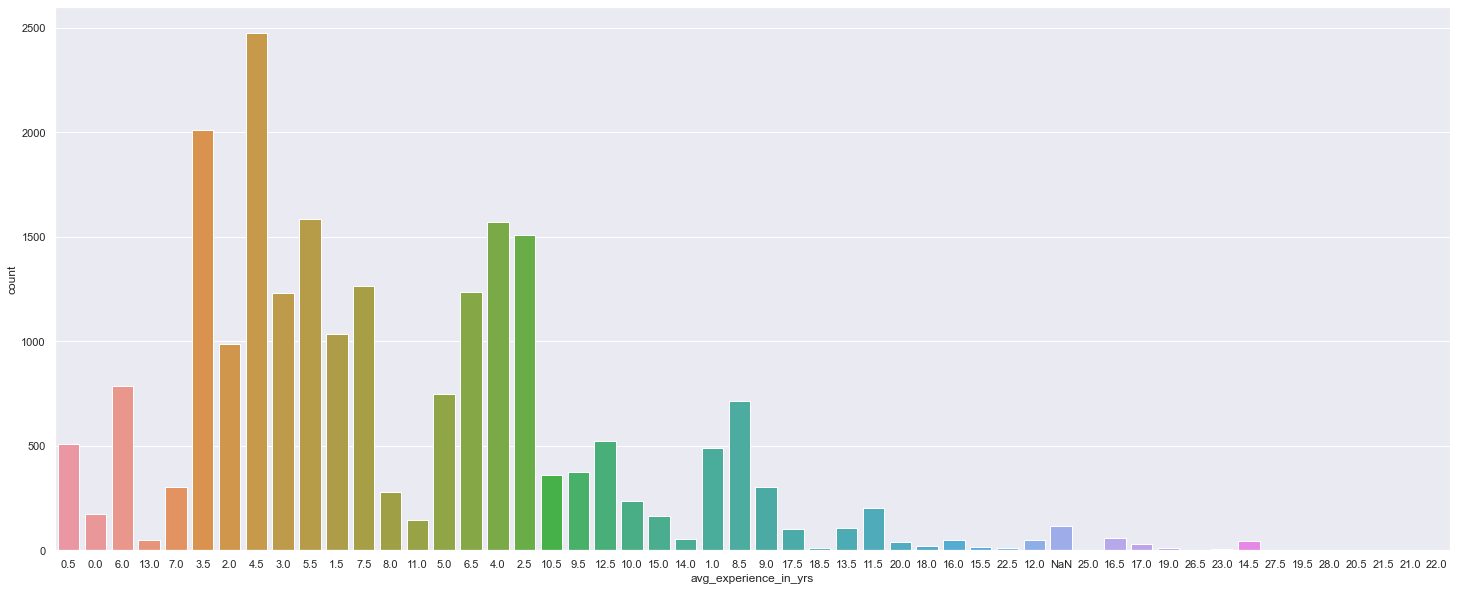

In [138]:
sns.set(rc={'figure.figsize':(25,10)})
ax = sns.countplot(x=(data['avg_experience_in_yrs']))

In [139]:
def avg_salary(n):
    if len(n)==2 and isinstance(n, tuple) and all(',' in i for i in n):
        return (int((n[0]).replace(',','')) + int((n[1]).replace(',','')))/2
    return 'NaN'

data['avg_salary'] = data['payrate'].apply(avg_salary)
data.head(5)

,company,education,experience,industry,jobtitle,payrate,skills,avg_experience_in_yrs,avg_salary
0,MM Media Pvt Ltd,"( B.Tech/B.E. - Any Specialization , Any Postg...","(0, 1)","Media, Entertainment, Internet",Walkin Data Entry Operator (night Shift),"(1,50,000, 2,25,000)",ITES,0.5,187500.0
1,find live infotech,"( B.Tech/B.E. - Any Specialization , MBA/PGDM ...","(0, 0)","Advertising, PR, MR, Event Management",Work Based Onhome Based Part Time.,"(1,50,000, 2,50,000)",Marketing,0.0,200000.0
2,Softtech Career Infosystem Pvt. Ltd,"( Any Graduate - Any Specialization , Any Post...","(4, 8)","IT-Software, Software Services",Pl/sql Developer - SQL,NaN,IT Software - Application Programming,6.0,NaN
3,Onboard HRServices LLP,"( Any Graduate - Any Specialization , CA Docto...","(11, 15)","Banking, Financial Services, Broking",Manager/ad/partner - Indirect Tax - CA,NaN,Accounts,13.0,NaN
4,Spire Technologies and Solutions Pvt. Ltd.,"( B.Tech/B.E. - Any Specialization , Any Postg...","(6, 8)","IT-Software, Software Services",JAVA Technical Lead (6-8 yrs) -,NaN,IT Software - Application Programming,7.0,NaN


In [143]:
def mean_salary(n):
    return sum(i if isinstance(i, float) else 0 for i in n)/len(n)

(mean_salary(data['avg_salary']))

129580.11363636363